<a href="https://colab.research.google.com/github/doissegundos/Brazil_Agriculture_and_Rural_Development/blob/main/explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brazil - Agriculture and Rural Development
#### Este trabalho faz uma analise dos dados do Dataset Brazil - Agriculture and Rural Development. Disponivel em :
https://data.world/hdx/39056c79-3267-42d3-98cd-595ac6d91578

##### Os dados apresentados aqui incluem medidas de insumos agrícolas, produtos e produtividade compilados pela Organização das Nações Unidas para Agricultura e Alimentação. Indicadores: Acesso à eletricidade, Terra agrícola irrigada, Terra agrícola, Maquinaria agrícola, Emissões de metano agrícola, Emissões de óxido nitroso agrícola, Exportação de matéria-prima agrícola, Importação de matéria-prima agrícola, Agricultura, Retirada anual de água doce, Terra arável, Precipitação média em profundidade, Cereais produção, Rendimento de cereais, Índice de produção de safras, Emprego na agricultura, Consumo de fertilizantes, Índice de produção de alimentos, Área de floresta, Área de terra, Terra com produção de cereais, Índice de produção de gado, Área de cultivo permanente, Área de terra rural, Área de terra rural onde a elevação é inferior a 5 metros, População rural, Crescimento da população rural, População rural vivendo em áreas onde a elevação é inferior a 5 metros, Área de superfície.

In [64]:
from google.colab import drive
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#Para os arquivos do Drive
drive.mount('/content/drive')
root_path = "drive/My Drive/dataset"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
df = pd.read_csv(r'drive/My Drive/datasets/agriculture-and-rural-development_bra.csv')

#### Visualizando as 7 primeiras instancias do dataset. Pode-se perceber que a linha 0 contém dados não interessantes, pois eles são apenas uma legenda dos dados. Logo teremos que remover esses dados. 

In [67]:
print('Quantidade de instâncias: {}\nQuantidade de atributos: {}\n'.format(len(df), len(df.columns)))
df[0:7]

Quantidade de instâncias: 1689
Quantidade de atributos: 6



,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Brazil,BRA,2006,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,788053
2,Brazil,BRA,2005,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,789622
3,Brazil,BRA,2004,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,791191
4,Brazil,BRA,2003,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,792760
5,Brazil,BRA,2002,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,794329
6,Brazil,BRA,2001,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,795898


In [68]:
#Removendo linha 0 exibindo a tabela formatada
df = df[1:len(df)]
#renomeia as colunas
df.columns = ["countryname",	"countrycode",	"Year",	"Name",	"indicatorcode",	"Cont"]
print('Quantidade de instâncias: {}\nQuantidade de atributos: {}\n'.format(len(df), len(df.columns)))
df[0:7]

Quantidade de instâncias: 1688
Quantidade de atributos: 6



,countryname,countrycode,Year,Name,indicatorcode,Cont
1,Brazil,BRA,2006,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,788053
2,Brazil,BRA,2005,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,789622
3,Brazil,BRA,2004,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,791191
4,Brazil,BRA,2003,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,792760
5,Brazil,BRA,2002,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,794329
6,Brazil,BRA,2001,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,795898
7,Brazil,BRA,2000,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,797466


In [69]:
#Converte os dados das colunas para os tipos desejados
df["Cont"] = df["Cont"].astype('float64')
df["Year"] = df["Year"].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 1 to 1688
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryname    1688 non-null   object 
 1   countrycode    1688 non-null   object 
 2   Year           1688 non-null   int32  
 3   Name           1688 non-null   object 
 4   indicatorcode  1688 non-null   object 
 5   Cont           1688 non-null   float64
dtypes: float64(1), int32(1), object(4)
memory usage: 72.7+ KB


#### Visualizando os dados 

Visualizando o dados sobre o uso de maquinas agriculturas entre 1970 e 1980

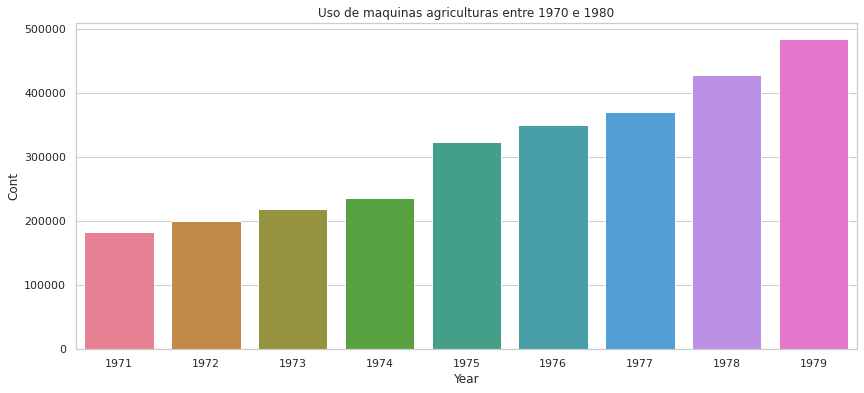

In [71]:
data = df.query('indicatorcode=="AG.AGR.TRAC.NO" & Year > 1970 & Year < 1980 ')
plt.figure(figsize=(14, 6))
sns.barplot(x="Year", y="Cont", data = data, palette="husl")
plt.title('Uso de maquinas agriculturas entre 1970 e 1980') 
plt.show()

Visualizando o dados sobre o consumo de fertilizantes entre 2000 e 2016

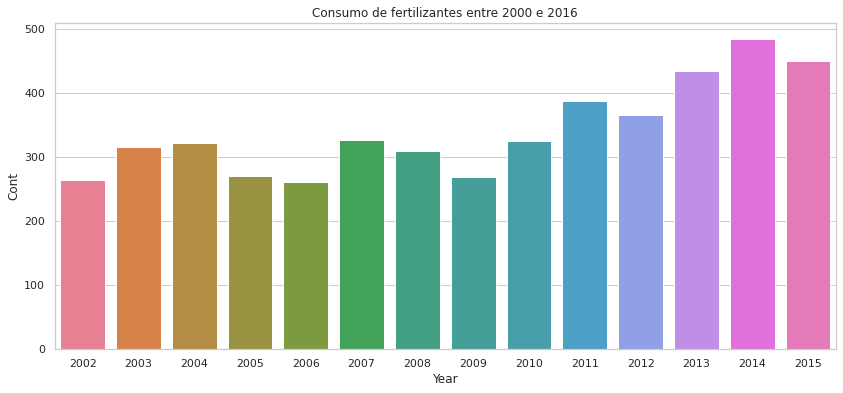

In [76]:
data = df.query('indicatorcode=="AG.CON.FERT.PT.ZS" & Year > 2000 & Year < 2016 ')
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.barplot(x="Year", y="Cont", data = data, palette="husl")
plt.title('Consumo de fertilizantes entre 2000 e 2016') 
plt.show()

Analize dos dados sobre o trabalho feminino na agricultura ao longo dos anos

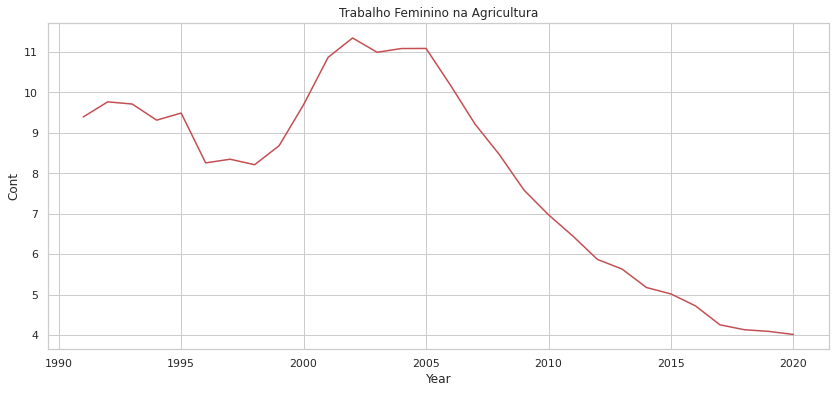

In [74]:
data = df.query('indicatorcode=="SL.AGR.EMPL.FE.ZS"')
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.lineplot(x="Year", y="Cont", data = data,color="r")
plt.title('Trabalho Feminino na Agricultura') 
plt.show()

Comparação entre a produção de comida e gado no Brasil

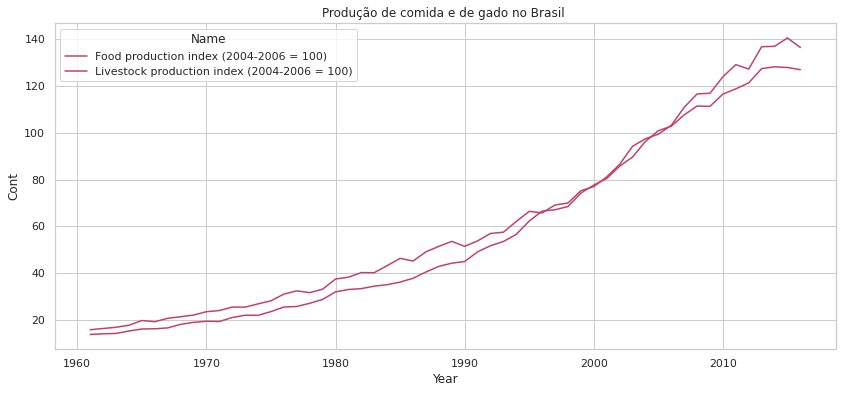

In [75]:
data1 = df.query('indicatorcode=="AG.PRD.FOOD.XD"')
data2 = df.query('indicatorcode=="AG.PRD.LVSK.XD"')
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.lineplot(x="Year", y="Cont", data = data1,hue="Name",palette="flare")
sns.lineplot(x="Year", y="Cont", data = data2,hue="Name",palette="flare")
plt.title('Produção de comida e de gado no Brasil ') 
plt.show()

Analizando os dados de agricultura florestal e pesca

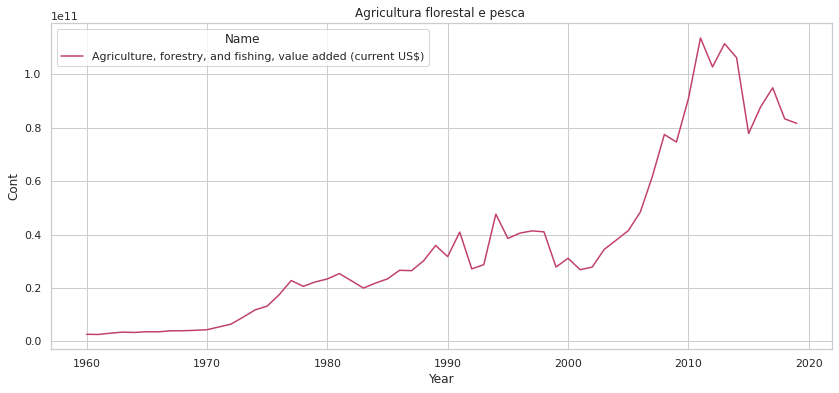

In [77]:
data1 = df.query('indicatorcode=="NV.AGR.TOTL.CD"')
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.lineplot(x="Year", y="Cont", data = data1,hue="Name",palette="flare")
plt.title('Agricultura florestal e pesca ') 
plt.show()

Comparação entre a emissão de gás metano e nitrogenio a partir do ano 1990

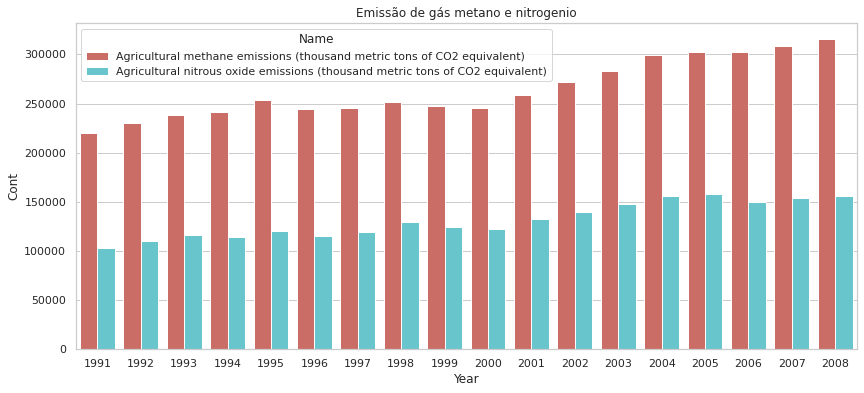

In [78]:
data = df.query('indicatorcode=="EN.ATM.METH.AG.KT.CE" or indicatorcode=="EN.ATM.NOXE.AG.KT.CE"')
data = data.query('Year>1990')
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.barplot(x="Year", y="Cont", hue="Name", data = data, palette="hls")
plt.title('Emissão de gás metano e nitrogenio') 
plt.show()



#### Para analizar todos os dados do dataset separadamente, de acordo com suas classes, pode-se utilizar o código abaixo como um guia.

In [ ]:
machine_agricultural = df.query('indicatorcode=="AG.AGR.TRAC.NO"')
fertilizer_consumer = df.query('indicatorcode=="AG.CON.FERT.PT.ZS"')
agricultural_land = df.query('indicatorcode=="AG.LND.AGRI.K2"')
arable_land = df.query('indicatorcode=="AG.LND.ARBL.HA"')
cereal_production = df.query('indicatorcode=="AG.LND.CREL.HA"')
permanent_cropland = df.query('indicatorcode=="AG.LND.CROP.ZS"')
forest_area = df.query('indicatorcode=="AG.LND.FRST.K2"')

agricultural_land_irrigation = df.query('indicatorcode=="AG.LND.IRIG.AG.ZS"')
averageprecipitation = df.query('indicatorcode=="AG.LND.PRCP.MM"')
land_area = df.query('indicatorcode=="AG.LND.TOTL.K2"')
rural_land_area = df.query('indicatorcode=="AG.LND.TOTL.RU.K2"')


machine_agricultural_tract = df.query('indicatorcode=="AG.LND.TRAC.ZS"')
crop_production = df.query('indicatorcode=="AG.PRD.CROP.XD"')
food_production = df.query('indicatorcode=="AG.PRD.FOOD.XD"')
livestock_production = df.query('indicatorcode=="AG.PRD.LVSK.XD"')


surface_area = df.query('indicatorcode=="AG.SRF.TOTL.K2"')
cereal_yield  = df.query('indicatorcode=="AG.YLD.CREL.KG"')
access_electricity = df.query('indicatorcode=="EG.ELC.ACCS.RU.ZS"')
agricultural_methane_emissions  = df.query('indicatorcode=="EN.ATM.METH.AG.KT.CE"')

agricultural_methane_emissions  = df.query('indicatorcode=="EN.ATM.METH.AG.KT.CE"')
agricultural_nitrous_oxide_emissions  = df.query('indicatorcode=="EN.ATM.NOXE.AG.KT.CE"')
rural_population  = df.query('indicatorcode=="EN.POP.EL5M.RU.ZS"')
annual_freshwater_withdrawals  = df.query('indicatorcode=="ER.H2O.FWAG.ZS"')

agriculture_forestry_fishing  = df.query('indicatorcode=="NV.AGR.TOTL.CD"')
employment_agriculture_female  = df.query('indicatorcode=="SL.AGR.EMPL.FE.ZS"')
rural_population_gr = df.query('indicatorcode=="SP.RUR.TOTL"')
agricultural_raw_materials_imports  = df.query('indicatorcode=="TM.VAL.AGRI.ZS.UN"')

